# Segmentation and Counting of Nuclei in an Image

This notebook demonstrates how to perform image processing using Python to segment and count nuclei in a microscopic image. We will use libraries like `skimage` and `matplotlib` for this purpose.

## Step 1: Load the Image

First, we will load the image using `skimage.io.imread`. The image is assumed to be stored in the `data` folder.

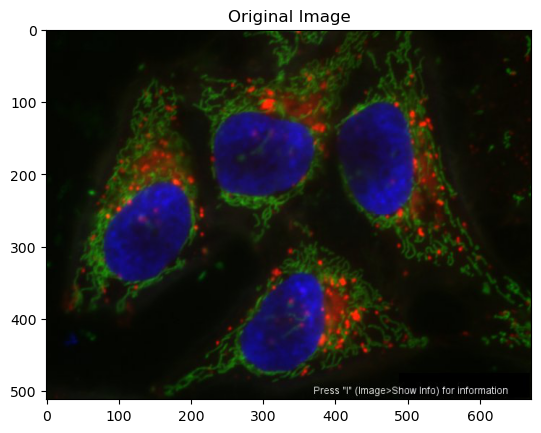

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_path = "../data/hela-cells-8bit.jpg"
image = io.imread(image_path)
plt.imshow(image)
plt.title("Original Image")
plt.show()

## Step 2: Extract the Blue Channel

The blue channel often corresponds to the DAPI stain used for nuclei. We will extract this channel for further processing.

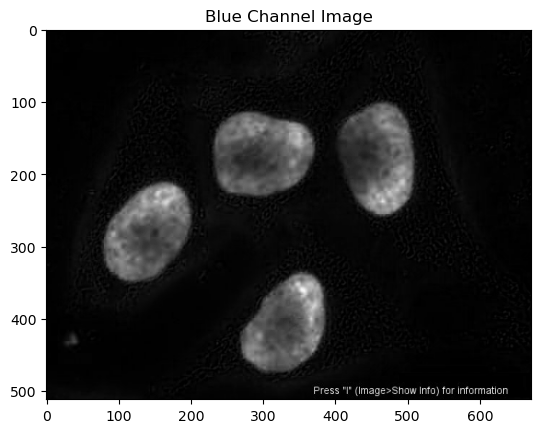

In [2]:
gray_image = image[..., 2]
plt.imshow(gray_image, cmap='gray')
plt.title("Blue Channel Image")
plt.show()

## Step 3: Apply Gaussian Blur

A Gaussian blur is applied to reduce noise in the image, which helps improve the accuracy of subsequent segmentation steps.

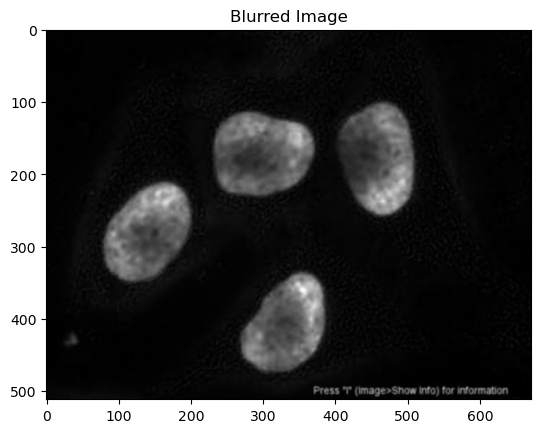

In [3]:
from skimage import filters

blurred_image = filters.gaussian(gray_image, sigma=1)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.show()

## Step 4: Apply Otsu's Thresholding

Otsu's thresholding is used to convert the grayscale image into a binary image, separating nuclei from the background.

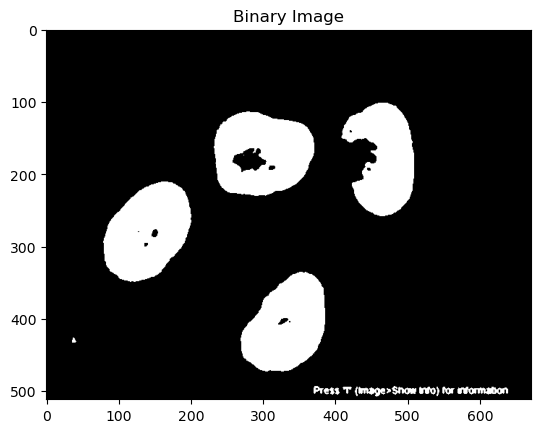

In [4]:
thresh = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > thresh
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()

## Step 5: Remove Small Objects

Small artifacts can be removed using morphological operations to improve segmentation quality.

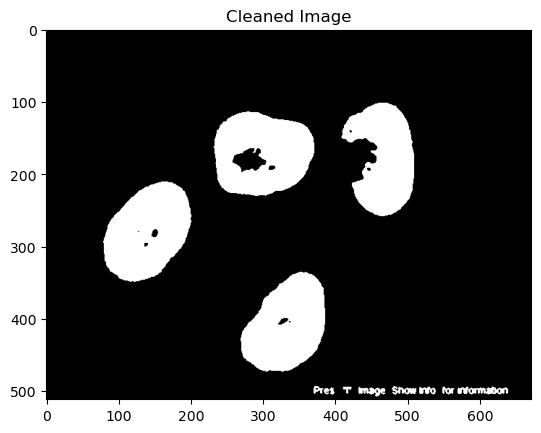

In [5]:
from skimage import morphology

cleaned_image = morphology.remove_small_objects(binary_image, min_size=50)
plt.imshow(cleaned_image, cmap='gray')
plt.title("Cleaned Image")
plt.show()

## Step 6: Label Nuclei and Count Them

Finally, we label the connected components in the binary image, each representing a nucleus, and count the number of nuclei.

Number of nuclei: 12


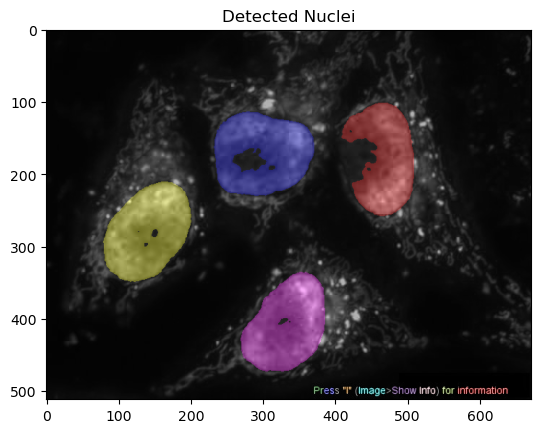

In [6]:
from skimage import measure, color

labeled_image = measure.label(cleaned_image)
nuclei_count = labeled_image.max()
print(f'Number of nuclei: {nuclei_count}')

plt.imshow(color.label2rgb(labeled_image, image=image, bg_label=0))
plt.title("Detected Nuclei")
plt.show()